# Textract

- Eine sehr generische lib um aus PDFs Textinformationen zu extrahieren.
- https://textract.readthedocs.io
- https://de.wikipedia.org/wiki/Tesseract_(Software)

```brew cask install xquartz
brew install poppler antiword unrtf tesseract swig
pip install pdftotext
pip install pdfminer.six
pip install textract
```

In [1]:
import textract

## Import aus Word Dateien

In [2]:
doc = textract.process("example.docx")
doc

'Schauen wir mal was das Programm so kann....\n\n\n\nEine \xc3\x9cberschrift\n\n\n\nID\n\nName\n\nGewicht\n\nGeschlecht\n\nWohnort\n\n1\n\nPlotti\n\n100\n\nM\n\nWinterthur\n\n2\n\nJana\n\n80\n\nF\n\nWinterthur\n\n3\n\nClara\n\n15\n\nF\n\nWinterthur\n\n\n\n\n\nMit besten Gr\xc3\xbcssen'

## Import aus PDF Dateien

In [3]:
doc = textract.process("example.pdf")
doc

'Schauen wir mal was das Programm so kann....\nEine \xc3\x9cberschrift\nID\n1\n2\n3\nMit besten Gr\xc3\xbcssen\n\nName\nPlotti\nJana\nClara\n\nGewicht\n100\n80\n15\n\nGeschlecht\nM\nF\nF\n\nWohnort\nWinterthur\nWinterthur\nWinterthur\n\n\x0c'

## Aus Bildern

In [8]:
doc = textract.process("example.png")
doc

'Schauen wir mal was das Programm so kann....\n\nEine Uberschrift\n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\n \n\nID Name Gewicht Geschlecht Wohnort\n\n1 Plotti 100 M Winterthur\n2 Jana 80 F Winterthur\n3 Clara 15 F Winterthur\n\n \n\n \n\nMit besten Griissen\n\n \n\x0c'

In [4]:
doc = textract.process("guardian.png")
doc

"Subscribe Searchjobs Dating Signin Searchyv UK edition v\nCee ei | e\ne e e e\nNews Opinion Culture Lifestyle Morev Guardian\n\nWorld > Europe US Americas Asia Australia MiddleEast Africa Inequality Cities Global development\n\n \n\nDenmark Panama Papers: Denmark buys leaked most viewed\ndata to use in tax evasion inquiries Bp, Live Chelsea 0-0 Everton:\n\n\xc2\xae Premier League - live!\n\nDenmark pays up to \xc2\xa31m for documents from anonymous source\n\nand plans to investigate up to 600 Danes who may have evaded Live Liverpool 2-0 Fulham:\n\ntax Premier League - as it\nhappened\nLuke Harding\nWed 7 Sep 2016 15.22 BST Live Manchester City v\n, Manchester United: Premier\nf vy @ 3 680 League - live!\n\xc2\xa9 This article is over 2 years old\nTrump cancels US cemetery\nvisit amid diplomatic\nembarrassment\n\n \n\nDemocrats set to investigate\nif Trump used \xe2\x80\x98state power' to\ntarget the press\n\nat\n\n \n\x0c"

# Smart Text Extraction 
- https://github.com/buriy/python-readability
- ```pip install readability-lxml```
- Wir möchten nur den Text auf der Webseite und nicht den "Rest", aber es gibt keinen RSS feed oder andere Eport Möglichkeiten. 

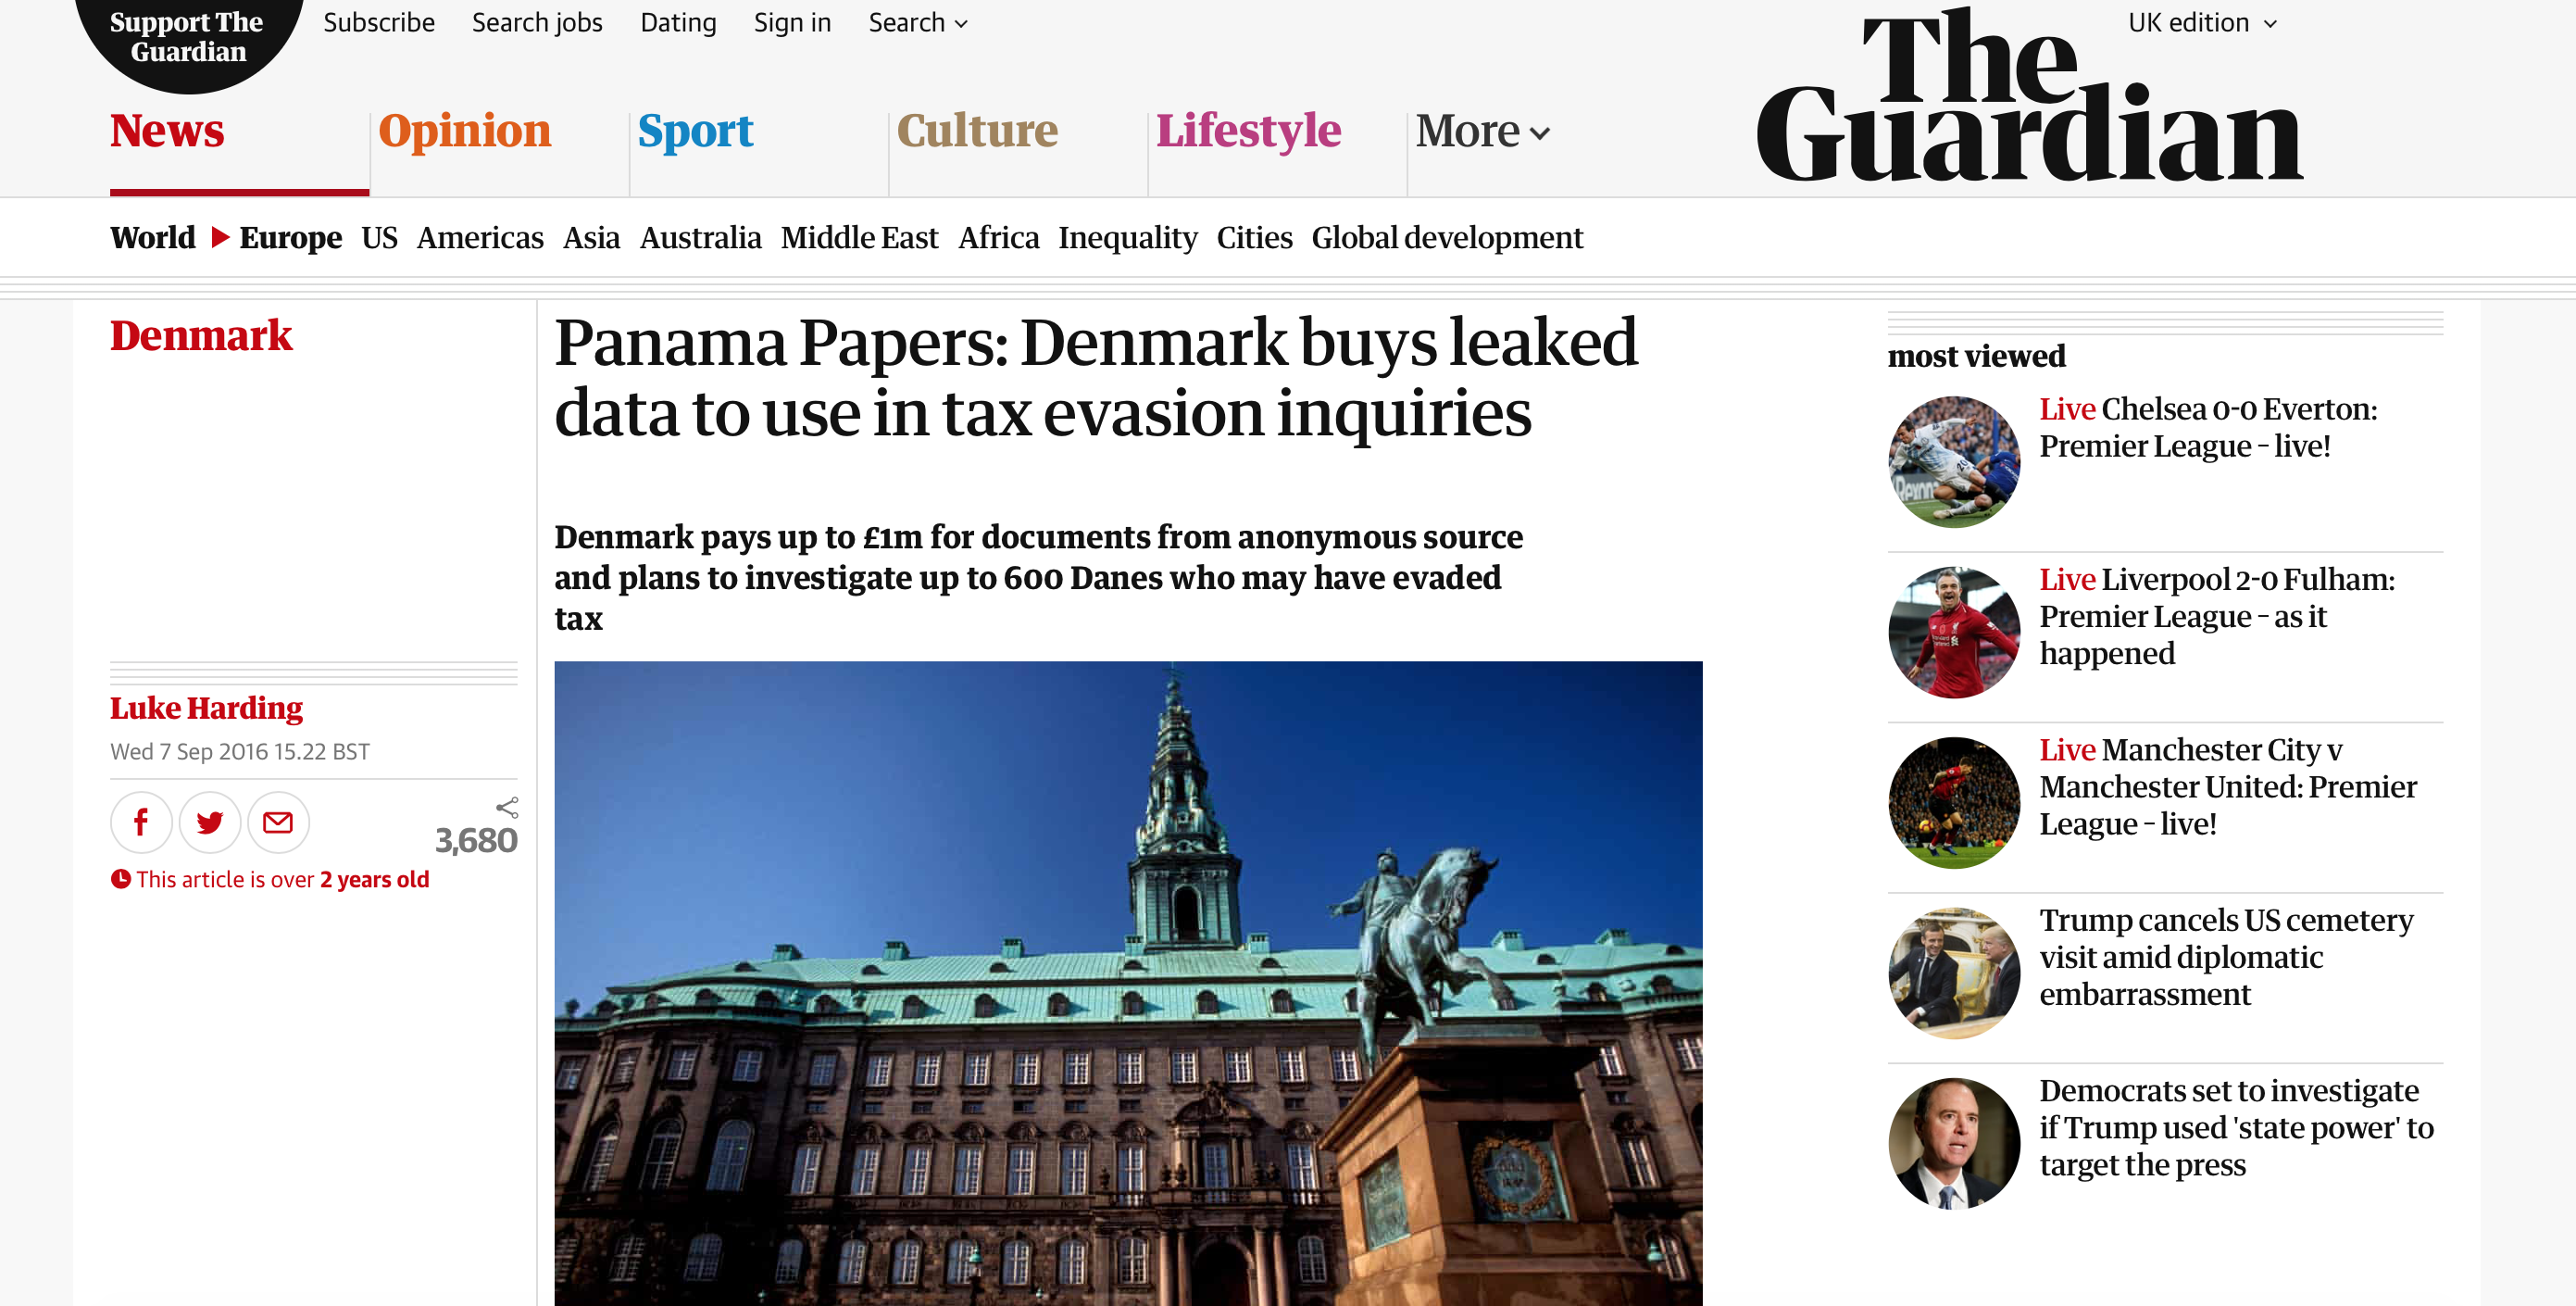

In [2]:
from IPython.display import Image
Image("guardian.png")

In [5]:
#import httplib2
import json
from readability.readability import Document
import urllib
import re
import requests
html = requests.get("https://www.theguardian.com/news/2016/sep/07/panama-papers-denmark-becomes-first-country-to-buy-leaked-data").text
readable_article = Document(html).summary()
readable_title = Document(html).short_title()
text = re.sub('<[^<]+?>', '', readable_article)
text = text.encode("ascii", "ignore")
text

'\nDenmark has become the first country in the world to apparently buy data from the Panama Papers leak, and now plans to investigate whether 500-600 Danes who feature in the offshore archive may have evaded tax.\nDenmarks tax minister, Karsten Lauritzen, said he will pay up to DKK9m (1m) for the information, which comes from the Panamanian law firm Mossack Fonseca. He said an anonymous source approached the Danish government over the summer.\nThe source sent over an initial sample of documents and the government reviewed them. After concluding they were genuine, it secretly negotiated support for the controversial deal from political parties in parliament, the minister said. \n\nEverything suggests that it is useful information. We owe it to all Danish taxpayers who faithfully pay their taxes, Lauritzen said, admitting that he had originally been very wary. He added: The material contains relevant and valid information about several hundred Danish taxpayers.\nDanish officials said the

# Beautifull soup with Selector Gadget
- installiert Euch selector gadget https://chrome.google.com/webstore/detail/selectorgadget/mhjhnkcfbdhnjickkkdbjoemdmbfginb
- Klickt auf die Elemente die Ihr wollt, sie werden gelb. 
- Wenn ein Element dabei ist das Ihr nicht möchtet, klickt es an dann wird der Selector tag verändert um es auszuschliessen. 
- Kopiert am Ende den CSS Selector in Beautifull Soup wie unten:

In [7]:
import requests
from bs4 import BeautifulSoup
r = requests.get('http://www.guardian.co.uk')
soup = BeautifulSoup(r.text, 'lxml')

In [11]:
soup.select("#sport .js-headline-text")[1]

<a aria-hidden="true" class="u-faux-block-link__overlay js-headline-text" data-link-name="article" href="https://www.theguardian.com/football/2018/nov/19/virgil-van-dijk-netherlands-germany-nations-league-republic-ireland-denmark" tabindex="-1">Dutch grab Nations League finals spot at the last</a>

## Saving Beautifull soup to File
- Oft habt Ihr das Problem das Beautiful Soup euch nur ein Resultat liefert bei dem die wichtigen Infos evtl. fehlen, weil sie per Javascript erst dynamisch nachgeladen werden. 
- Um das zu inspizieren könnt ihr die Soup als File speichern und mit Eurem Browser öffnen. 

In [12]:
import requests
from bs4 import BeautifulSoup
r = requests.get('https://www.viajob.ro/munca-strainatate?tara=Elvetia')
soup = BeautifulSoup(r.text, 'lxml')

In [15]:
soup

<!DOCTYPE html>\n<html lang="ro-RO" prefix="og: http://ogp.me/ns#">\n<head>\n<meta charset="unicode-escape"/>\n<meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n<link href="https://www.viajob.ro/xmlrpc.php" rel="pingback"/>\n<script type="text/javascript">\n\t\tdocument.documentElement.className = 'js';\n\t</script>\n<title>Munca straintate | Joburi si angajari strainatate - Viajob.ro</title>\n<!-- This site is optimized with the Yoast SEO plugin v9.1 - https://yoast.com/wordpress/plugins/seo/ -->\n<meta content="Locuri de munca strainatate cu cele mai bune oferte de munca. Anunturi angajari, joburi si oferte de lucru. Munca strainatate fara comision simplu si rapid." name="description"/>\n<link href="https://www.viajob.ro/munca-strainatate" rel="canonical"/>\n<link href="https://plus.google.com/+ViajobRomania" rel="publisher"/>\n<meta content="en_US" property="og:locale"/>\n<meta content="article" property="og:type"/>\n<meta content="Munca straintate | Joburi si angajari straina

In [17]:
with open("output1.html", "w") as file:
    file.write(str(soup))